# Utilitarian Polyglot: _What languages do you need to speak with the most people?_

![OPLingo](oplingo_logo.png)

## Libraries

Let's import libraries for analysind and visualising data. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle
import folium

## English-speaking populations in various countries

This data originates from Wikipedia's [List of countries by English-speaking population](https://en.wikipedia.org/wiki/List_of_countries_by_English-speaking_population). Some countries have been added (see column _Source_) and some names of countries have been changed. 

In [2]:
proportion_english_speaking = pd.read_csv(
    'proportion_english_speaking.csv'
)

In [3]:
proportion_english_speaking.head()

,Country,Total population,Total English speakers,Percentage,Source
0,Algeria,35954000,2516780,0.0700,https://en.wikipedia.org/wiki/List_of_countrie...
1,American Samoa,57345,45933,0.8010,https://en.wikipedia.org/wiki/List_of_countrie...
2,Andorra,81222,17868,0.2200,https://en.wikipedia.org/wiki/List_of_countrie...
3,Anguilla,13000,12000,0.9231,https://en.wikipedia.org/wiki/List_of_countrie...
4,Antigua and Barbuda,85000,68000,0.8000,https://en.wikipedia.org/wiki/List_of_countrie...


In [6]:
total_english = proportion_english_speaking['Total English speakers'].sum()
total_world = 7800000000
print(
    '''
    Total number of English-speakers:\t\t{:,}
    As a percentage of world population:\t{:.0%}
    '''.format(
        total_english,
        total_english / total_world
    )
)


    Total number of English-speakers:		1,521,817,350
    As a percentage of world population:	20%
    


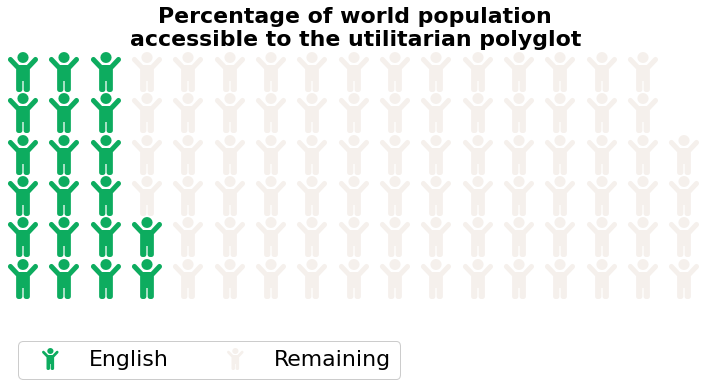

In [7]:
accessible = {
    'English': total_english / total_world * 100,
    'Remaining': (total_world - total_english) / total_world * 100
}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6, 
    values=accessible, 
    colors=["#0dac5f", "#f5f0ec"],
    title={
        'label': 'Percentage of world population\naccessible to the utilitarian polyglot', 
        'loc': 'center', 
        'fontsize': 22, 
        'fontweight': 'bold'
    },
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(accessible),
        'framealpha': 1,
        'fontsize': 22
    },
    icons='child', 
    font_size=40, 
    figsize=(10, 5),
    icon_legend=True
)

Let's plot the proportion of English-speaking populations by country on a map. The map comes from [here](https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json). The names of some countries have been changed to fit with other data. 

In [8]:
with open('world-countries.json') as geojson:
    maps = json.load(geojson)
    
m = folium.Map(
    location=[30, 0],
    tiles='CartoDB Positron No Labels',
    zoom_start=2,
    min_zoom=2,
    zoom_control=False,
    min_lat=-60,
    max_lat=80,
    max_bounds=True,
)

map = folium.Choropleth(
    geo_data=maps,
    name='choropleth',
    data=proportion_english_speaking,
    columns=['Country', 'Percentage'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',
    nan_fill_color='black',
    nan_fill_opacity=0.2,
    line_color='white'
).add_to(m)

folium.GeoJsonTooltip(
    fields=['name'],
    labels=False
).add_to(map.geojson)

folium.Marker(
    location=[-40, -40],
    icon=folium.DivIcon(
        html='''
        <div style="
            background-color: rgba(242, 242, 242, 0.5);
            border-radius: 5px;
            box-shadow: 4px 4px 8px 0 rgba(0, 0, 0, 0.2), 6px 6px 20px 0 rgba(0, 0, 0, 0.19);
            border: 1px solid black;
            padding: 4px 5px;
            display: inline-block;
            font-size: 20px;
        ">
            <span>
                <strong>Percentage of English-speaking population</strong>
                <br /><strong>by country</strong>
            </span>
        </div>
        ''',
        icon_size=(1000, 0),
        icon_anchor=(0, 0),
    )
).add_to(m)

display(m)

Let's see how much data we're missing here. The population numbers come from Wikipedia's [List of countries by population](https://en.wikipedia.org/wiki/List_of_countries_by_population). The names of some countries have been changed to fit with other data. 

In [9]:
population = pd.read_csv(
    'population.csv'
)

population.set_index('Country', inplace=True)

population.head()

,Population
Country,
China,1405660160
India,1370601758
United States,330781533
Indonesia,269603400
Pakistan,220892331


In [10]:
# getting a list of all countries
countries = []

for i in maps['features']:
    countries.append(i['properties']['name'])
    
# populating (ha) the list of countries we don't have data on
population_index = []

for i in sorted(set(countries).difference(set(proportion_english_speaking['Country']))):
    if i in population.index:
        population_index.append(i)
        
unknown = population.loc[population_index].sort_values('Population', ascending=False)

print(
    '''
    No data - number of countries:\t{}
    
    No data - total population:\t\t{:,}
    '''.format(
        len(unknown), unknown['Population'].sum()
    )
)

unknown


    No data - number of countries:	73
    
    No data - total population:		799,176,501
    


,Population
Country,
Sudan,43051890
Uzbekistan,34568514
Saudi Arabia,34218169
Afghanistan,32890171
Peru,32625948
...,...
Western Sahara,597000
The Bahamas,389410
Northern Cyprus,351965
